# Spezielle Aspekte Projekt 

###### Dependencies
- pandas
- numpy
- scikit-learn
- matplotlib

## Preprocessing

In [13]:
""" 
Import of the different libraries for preprocessing the data.

pandas is a library for Python which provides tools for data 
management and analysis. In particular, it contains data structures and 
Operators for accessing numerical tables and time sequences.

NumPy is a library which allows an easy handling of vectors, 
matrices or generally large multidimensional arrays. 
Besides data structures NumPy also offers
functions for numerical calculations.

warnings is a library for handling warnings. The determination whether 
to issue a warning message is controlled by the warning filter, 
which is a sequence of matching rules and actions. Rules can be added 
to the filter by calling filterwarnings(). The warning filter „ignore“ 
will never print matching warnings.
"""
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [14]:
""" 
Locating and importing the data set with pandas. 
"""

path_to_file = "../data/Component_Faults_Data.csv"
df = pd.read_csv(path_to_file)

In [19]:
df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V40,V41,V42,V43,V44,V45,V46,V47,V48,class
0,2.913200e-06,-5.247700e-06,0.000003,-6.056100e-06,2.778900e-06,-3.752400e-06,0.030804,0.030810,0.030806,-0.033520,...,-0.59314,7.6252,6.1690,-1.4967,-1.4967,-1.4967,-1.5005,-1.5005,-1.5005,1
1,-9.584900e-07,5.214300e-08,-0.000047,6.453700e-07,-2.304100e-06,5.499900e-05,0.031154,0.031154,0.031201,-0.032789,...,-0.61124,5.8337,18.6970,-1.4956,-1.4956,-1.4956,-1.4973,-1.4972,-1.4973,1
2,-2.566600e-06,-1.679500e-07,0.000015,-1.598400e-06,8.709200e-07,1.496100e-05,0.031071,0.031071,0.031056,-0.029695,...,-0.63618,12.8380,4.9079,-1.4990,-1.4990,-1.4990,-1.4968,-1.4968,-1.4968,1
3,2.825600e-06,6.067600e-06,0.000118,-4.347500e-06,1.492300e-06,-2.917100e-06,0.030947,0.030941,0.030823,-0.032171,...,-0.58170,2.0511,8.8939,-1.4963,-1.4963,-1.4963,-1.4943,-1.4943,-1.4943,1
4,-6.573800e-07,-3.951900e-07,0.000032,-5.296100e-06,-1.605800e-06,7.566000e-07,0.029416,0.029416,0.029385,-0.028420,...,-0.59578,5.3394,13.3550,-1.4984,-1.4984,-1.4984,-1.4970,-1.4970,-1.4970,1


In [15]:
"""
To feed the neural network we need to have our data to be in arrays. We do this with the help of
iloc which saves all our dataframe data as numpy arrays.
"""

x = df.iloc[:, :48].values
y = df["class"].values.reshape(-1, 1)

In [20]:
x

array([[ 0.09844495, -0.11408796,  0.00948314, ..., -0.88478151,
        -0.87780012, -0.90851779],
       [ 0.03516215, -0.02384314, -0.21314673, ...,  0.14331092,
         0.18269867,  0.11538236],
       [ 0.00887758, -0.02759085,  0.05996194, ...,  0.30395036,
         0.31124398,  0.27536675],
       ...,
       [-0.14768145, -0.34919631, -3.26188475, ...,  1.81396111,
         1.78951503,  1.84321385],
       [-0.04491548,  0.29188444, -0.45180341, ...,  2.13523999,
         2.1108783 ,  2.13118576],
       [-0.09387859,  0.86512632,  0.31300802, ...,  1.04289179,
         1.01824318,  1.07528874]])

In [21]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [16]:
"""
Scikit-learn is a library for machine learning. It provides various classification, 
regression and clustering algorithms. In this section we need it to standardize the data.
The goal of standardisation is to change the values of the numeric columns in 
the data set to a common scale without distorting the differences in the value ranges. 
If non-standardized data is fed to the neural network, the gradients will change differently 
for every column and thus the learning will oscillate.
"""

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [22]:
x

array([[ 0.09844495, -0.11408796,  0.00948314, ..., -0.88478151,
        -0.87780012, -0.90851779],
       [ 0.03516215, -0.02384314, -0.21314673, ...,  0.14331092,
         0.18269867,  0.11538236],
       [ 0.00887758, -0.02759085,  0.05996194, ...,  0.30395036,
         0.31124398,  0.27536675],
       ...,
       [-0.14768145, -0.34919631, -3.26188475, ...,  1.81396111,
         1.78951503,  1.84321385],
       [-0.04491548,  0.29188444, -0.45180341, ...,  2.13523999,
         2.1108783 ,  2.13118576],
       [-0.09387859,  0.86512632,  0.31300802, ...,  1.04289179,
         1.01824318,  1.07528874]])

In [17]:
"""
Right now we have different non-binary integer classes in our dataset. We cannot feed the
neural network directly like that. We first need to convert integer classes into binary values.
For each class we then will have a unique binary value. For this step, we use the OneHotEncoding algorithm. 
"""

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

In [23]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [18]:
"""
Here we split the data set into a training and a testing part.
The training set will feed the neural network with info for interpreting
the values. After that, the testing data is used to see how
good our neural network peformes. 
Our training set will have 90% of the data while the testing 
set will have 10% of the data.
"""

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

## Data Exploration

In [7]:
import matplotlib.pyplot as plt
#Looking at the dataset before performing any transformations, we see that the range of values is quite large
#and differs a lot from class to class
#V3

print(df['V3'].describe())
df['V3'].hist(bins=100)
plt.title('V3')
plt.show()

count    2.925500e+04
mean     1.182436e-06
std      2.277411e-04
min     -6.055700e-03
25%     -7.369750e-05
50%      7.743100e-07
75%      7.569250e-05
max      3.330400e-03
Name: V3, dtype: float64


<Figure size 640x480 with 1 Axes>

count    29255.000000
mean         0.001774
std          0.036425
min         -0.130630
25%         -0.020205
50%          0.013157
75%          0.024576
max          0.068515
Name: V7, dtype: float64


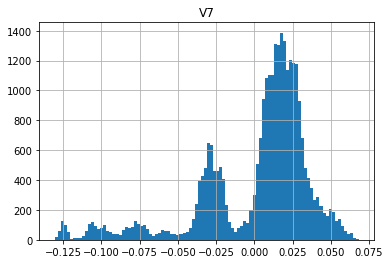

In [8]:
#V7
print(df['V7'].describe())
df['V7'].hist(bins=100)
plt.title('V7')
plt.show()

count    29255.000000
mean         7.417750
std         12.113144
min         -0.581230
25%          1.475700
50%          3.297900
75%          8.364350
max        312.520000
Name: V38, dtype: float64


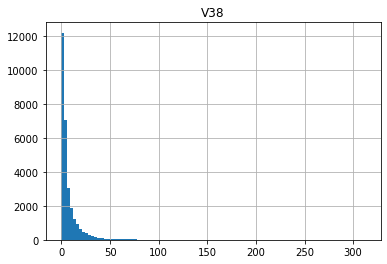

In [9]:
#V38
print(df['V38'].describe())
df['V38'].hist(bins=100)
plt.title('V38')
plt.show()

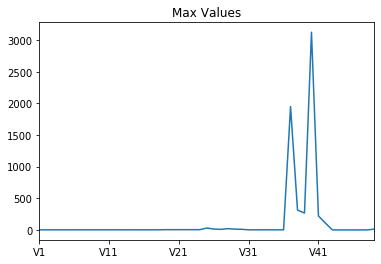

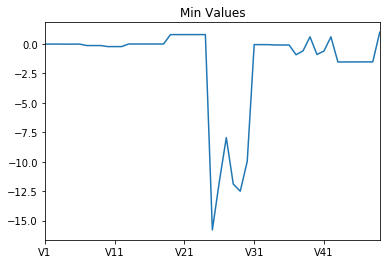

In [10]:
#min max values
headers=list(df)

#max values
df.max().plot()
plt.title('Max Values')
plt.xticks()
plt.show()
#min values
df.min().plot()
plt.title('Min Values')
plt.show()

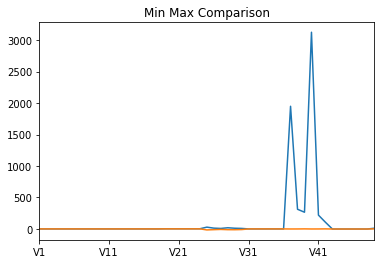

In [11]:
#combined
df.max().plot()
df.min().plot()
plt.title('Min Max Comparison')
plt.show()

## Newer Solution for testing NN-Configuration

In [12]:
# imports
import sys
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt    
import itertools
        

""" 
    Die folgende Klasse hilft beim Streamlining des Aufbaus, des Trainieren und der Prüfung eines Neuronalen Netzwerks (NN)
    Damit können wir die Auswirkung auf das Ergebnis bei der Änderung eines einzelnen Parameters sehen 
    Wir müssen also nur den Namen des Parameters, den wir ändern müssen, und die Werte, mit denen wir ihn testen wollen, angeben,
    was das testen Parametern schwer erleichtert
    
    Die einzigen Methoden die das Neuronale Netz tatsächlich implementieren sin "run", "build", "train" und "test"
"""
class NeuralNetworkParameterTester:

    # Die Config hält alle (veränderbaren) Parameter zum bauen, trainieren und testen des NN
    parameter_config = {
                'number_of_hidden_layers': [1],
                'number_of_units_per_hidden_layer': [10],
                'epochs': [100],
                'batch_size': [64],
                'activation_function': ['relu'],
                'loss_function': ['categorical_crossentropy'],
                'optimizer': ['sgd']}
    
    # Ergebnis eines Tests
    result = []
    
    """ 
        If you want to test your parameters, then you have to call this class
    """       
    def run(self):
        
        # Ergebnis zurücksetzen
        self.result = []
        
        # Für alle möglichen parameter combinationen ...
        for config in self.__get_all_config_combinations():
            # ... baue das NN-Modell
            model = self.__build(config)
            # ... trainiere das NN-Modell 
            trained_model, history = self.__train(config, model)
            # ... teste des NN-Modell
            accuracy = self.__test(trained_model)

            # Speichern der Ergebnisse
            self.result.append({'parameter_config': config.copy(), 
                                "result": {'model': trained_model, 
                                           'accuracy': accuracy}})
            
    """ 
        Folgende Methode gibt alle möglichen Kombinationen der Konfiguration zurück
    """          
    def __get_all_config_combinations(self):

        raw_combinations = list(itertools.product(*(self.parameter_config[parameter] for parameter in self.parameter_config)))

        config_combinations_list = []
        for combination in raw_combinations:
            c = {
                'number_of_hidden_layers': combination[0],
                'number_of_units_per_hidden_layer': combination[1],
                'epochs': combination[2],
                'batch_size': combination[3],
                'activation_function': combination[4],
                'loss_function': combination[5],
                'optimizer': combination[6]}
            
            config_combinations_list.append(c)
        
        return config_combinations_list
    
    """ 
        Die folgende Methode baut die Grundstrukturen des Modells
    """   
    def __build(self, config):

        # Sequential model (Basic NN)
        model = Sequential()        
        # Bauen des input layers
        model.add(Dense(config['number_of_units_per_hidden_layer'], 
                        input_dim=48, 
                        activation=config['activation_function']))
        # Bauen des/der hidden layer(s)
        for i in range(config['number_of_hidden_layers']):
            model.add(Dense(config['number_of_units_per_hidden_layer'], 
                            activation=config['activation_function'], use_bias=True))
        # Bauen des output layers
        model.add(Dense(11, activation="softmax"))
        
        model.compile(loss=config['loss_function'], 
                      optimizer=config['optimizer'], 
                      metrics=['accuracy'])
        return model
    
    """ 
        Die folgende Methode trainiert das zuvor gebaute Modell 
    """   
    def __train(self, config, model):
        # xtrain and ytrain sind die Daten von Preprocessing
        history = model.fit(x_train, 
                            y_train, 
                            epochs=config['epochs'], 
                            batch_size=config['batch_size'])  
        
        return model, history
    
    """ 
        Folgende Methode testet das Modell. In diesem Fall testet es
        die Genauigkeit des Modells
    """ 
    
    @staticmethod
    def __test(model):
        # Modell prognostiziert Ergebnisse des Testsets
        y_pred = model.predict(x_test)
        
        # Konvertieren von Prognose zu label
        pred = []
        for i in range(len(y_pred)):
            pred.append(np.argmax(y_pred[i]))
            
        # Konvertieren von one hot encoded test label zu label
        test = []
        for i in range(len(y_test)):
            test.append(np.argmax(y_test[i]))

        from sklearn.metrics import accuracy_score
        accuracy = accuracy_score(pred, test)
        
        return accuracy
                                    
                                    
    #--------------- Settermethoden --------------------------------------#
    
    def set_number_of_hidden_layers(self, val):
        if isinstance(val, list):
            self.parameter_config["number_of_hidden_layers"] = val
        else:
            self.parameter_config["number_of_hidden_layers"] = [val]
        
    def set_number_of_units_per_hidden_layer(self, val):
        if isinstance(val, list):
            self.parameter_config["number_of_units_per_hidden_layer"] = val
        else:
            self.parameter_config["number_of_units_per_hidden_layer"] = [val]
        
    def set_activation_function(self, val):
        if isinstance(val, list):
            self.parameter_config["activation_function"] = val
        else:
            self.parameter_config["activation_function"] = [val]
        
    def set_epochs(self, val):
        if isinstance(val, list):
            self.parameter_config["epochs"] = val
        else:
            self.parameter_config["epochs"] = [val]
        
    def set_batch_size(self, val):
        if isinstance(val, list):
            self.parameter_config["batch_size"] = val
        else:
            self.parameter_config["batch_size"] = [val]
        
    def set_loss_function(self, val):
        if isinstance(val, list):
            self.parameter_config["loss_function"] = val
        else:
            self.parameter_config["loss_function"] = [val]
        
    def set_optimizer(self, val):
        if isinstance(val, list):
            self.parameter_config["optimizer"] = val
        else:
            self.parameter_config["optimizer"] = [val]
        
    #--------------- Resetten der Konfiguration auf die Default-Werte --------------------------------------#
    
    def reset_config(self):
        parameter_config = {
            'number_of_hidden_layers': [1],
            'number_of_units_per_hidden_layer': [10],
            'epochs': [100],
            'batch_size': [64],
            'activation_function': ['relu'],
            'loss_function': ['categorical_crossentropy'],
            'optimizer': ['sgd']}
        
        self.parameter_config = parameter_config
        
        
    #--------------- Hilfsmethoden -----------------------------------------------------------#
        
    def __get_number_of_params_with_multiple_vals(self):
        number_of_params_with_multiple_vals = 0 
        for key in self.parameter_config.keys():
            if len(self.parameter_config[key]) > 1:
                number_of_params_with_multiple_vals += 1
        return number_of_params_with_multiple_vals
    
    def __get_param_names_with_multiple_vals(self):
        param_names_with_multiple_vals = [] 
        for key in self.parameter_config.keys():
            if len(self.parameter_config[key]) > 1:
                param_names_with_multiple_vals.append(key)
        return param_names_with_multiple_vals
        
        
    #--------------- Plotmethoden -----------------------------------------------------------#
    
    def plot_result(self):
        
        number_of_params_with_multiple_vals = self.__get_number_of_params_with_multiple_vals()
        param_names_with_multiple_vals = self.__get_param_names_with_multiple_vals()
        
        if number_of_params_with_multiple_vals == 1:
            self.__plot_2d(param_names_with_multiple_vals[0])
        else:
            print("Plotting for this result is not supported")
        
    def __plot_2d(self, param_name_with_multiple_vals):

        param_vals = [element['parameter_config'][param_name_with_multiple_vals] for element in self.result]
        accuracy_result = [element['result']['accuracy'] for element in self.result]

        plt.scatter(param_vals, accuracy_result)
        plt.plot(param_vals, accuracy_result, linestyle='--')
        plt.title("Accuracy per " + "'" + param_name_with_multiple_vals + "'")
        plt.ylabel("Accuracy")
        plt.xlabel(param_name_with_multiple_vals)
        plt.show()
        
        print("\n\n")
        
        df = pd.DataFrame(list(zip(param_vals, accuracy_result)), 
               columns =[param_name_with_multiple_vals, 'Accuracy']) 
        print(df)

Using TensorFlow backend.


In [40]:
# -------------- Diese Zelle nicht auführen! -------------#
# -------------- Dient nur zu Erklärung! -----------------#

# run()
        
for config in all_possibel_config_combinations:
    
    model = self.build(config)
    
    trained_model, history = self.train(config, model)
    
    accuracy = self.test(trained_model)

            
#----------------------------------------------------------------------------#

# build(self, config)

model = Sequential()    

model.add(Dense(config['number_of_units_per_hidden_layer'], 
                input_dim=48, 
                activation=config['activation_function']))

for i in range(config['number_of_hidden_layers']):
    model.add(Dense(config['number_of_units_per_hidden_layer'], 
                    activation=config['activation_function'], use_bias=True))
    
model.add(Dense(11, activation="softmax"))

model.compile(loss=config['loss_function'], 
              optimizer=config['optimizer'], 
              metrics=['accuracy'])

return model
        
#----------------------------------------------------------------------------#   

# train(self, config, model)

history = model.fit(x_train, y_train, 
                    epochs=config['epochs'], 
                    batch_size=config['batch_size'])

return trained_model, history
        

#----------------------------------------------------------------------------#   

# test(model)


y_pred = model.predict(x_test)

pred = list()

for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
    
test = list()

for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(pred, test)

return accuracy

NameError: name 'all_possibel_config_combinations' is not defined

## Test NN with parameters

In [13]:
nnpt = NeuralNetworkParameterTester()

In [14]:
nnpt.parameter_config

{'number_of_hidden_layers': [1],
 'number_of_units_per_hidden_layer': [10],
 'epochs': [100],
 'batch_size': [64],
 'activation_function': ['relu'],
 'loss_function': ['categorical_crossentropy'],
 'optimizer': ['sgd']}

In [15]:
nnpt.set_number_of_hidden_layers([2, 4, 8])

In [16]:
nnpt.parameter_config

{'number_of_hidden_layers': [2, 4, 8],
 'number_of_units_per_hidden_layer': [10],
 'epochs': [100],
 'batch_size': [64],
 'activation_function': ['relu'],
 'loss_function': ['categorical_crossentropy'],
 'optimizer': ['sgd']}

In [17]:
nnpt.run()






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





26329/26329 [==============================] - 2s 75us/step - loss: 2.2865 - acc: 0.1520
Epoch 2/100
26329/26329 [==============================] - 1s 27us/step - loss: 1.8419 - acc: 0.2596
Epoch 3/100
26329/26329 [==============================] - 1s 25us/step - loss: 1.4394 - acc: 0.3876
Epoch 4/100
26329/26329 [==============================] - 1s 26us/step - loss: 1.1093 - acc: 0.5510
Epoch 5/100
26329/26329 [==============================] - 1s 25us/step - loss: 0.9074 - acc: 0.6530
Epoch 6/100
26329/26329 [==============================] - 1s 25us/step - loss: 0.7651 - acc: 0.7134
Epoch 7/100
26329/26329 [==============================] - 1s 26us/step - loss: 0.6359 - acc: 0.7646
Epoch 8/100
26329/26329 [==============================] - 1s 25us/step - loss: 0.5250 - acc: 0.8093
Epoch 9/100
26329/26329 [==============================] - 1s 25us/step - loss: 0.445

26329/26329 [==============================] - 1s 27us/step - loss: 0.1364 - acc: 0.9542
Epoch 34/100
26329/26329 [==============================] - 1s 27us/step - loss: 0.1345 - acc: 0.9550
Epoch 35/100
26329/26329 [==============================] - 1s 28us/step - loss: 0.1332 - acc: 0.9549
Epoch 36/100
26329/26329 [==============================] - 1s 28us/step - loss: 0.1285 - acc: 0.9559
Epoch 37/100
26329/26329 [==============================] - 1s 29us/step - loss: 0.1266 - acc: 0.9557
Epoch 38/100
26329/26329 [==============================] - 1s 28us/step - loss: 0.1242 - acc: 0.9572
Epoch 39/100
26329/26329 [==============================] - 1s 28us/step - loss: 0.1217 - acc: 0.9575
Epoch 40/100
26329/26329 [==============================] - 1s 32us/step - loss: 0.1186 - acc: 0.9598
Epoch 41/100
26329/26329 [==============================] - 1s 29us/step - loss: 0.1173 - acc: 0.9599
Epoch 42/100
26329/26329 [==============================] - 1s 28us/step - loss: 0.1159 - acc: 

26329/26329 [==============================] - 1s 33us/step - loss: 1.2044 - acc: 0.4722
Epoch 14/100
26329/26329 [==============================] - 1s 34us/step - loss: 1.1618 - acc: 0.5511
Epoch 15/100
26329/26329 [==============================] - 1s 34us/step - loss: 1.0202 - acc: 0.6080
Epoch 16/100
26329/26329 [==============================] - 1s 34us/step - loss: 0.8975 - acc: 0.6224
Epoch 17/100
26329/26329 [==============================] - 1s 34us/step - loss: 0.8207 - acc: 0.6343
Epoch 18/100
26329/26329 [==============================] - 1s 34us/step - loss: 0.7656 - acc: 0.6466
Epoch 19/100
26329/26329 [==============================] - 1s 34us/step - loss: 0.7475 - acc: 0.6524
Epoch 20/100
26329/26329 [==============================] - 1s 34us/step - loss: 0.7073 - acc: 0.6557
Epoch 21/100
26329/26329 [==============================] - 1s 33us/step - loss: 0.6870 - acc: 0.6707
Epoch 22/100
26329/26329 [==============================] - ETA: 0s - loss: 0.6822 - acc: 0.676

26329/26329 [==============================] - 1s 34us/step - loss: 0.0997 - acc: 0.9687
Epoch 94/100
26329/26329 [==============================] - 1s 34us/step - loss: 0.0968 - acc: 0.9688
Epoch 95/100
26329/26329 [==============================] - 1s 34us/step - loss: 0.1026 - acc: 0.9674
Epoch 96/100
26329/26329 [==============================] - 1s 34us/step - loss: 0.0958 - acc: 0.9688
Epoch 97/100
26329/26329 [==============================] - 1s 34us/step - loss: 0.0926 - acc: 0.9707
Epoch 98/100
26329/26329 [==============================] - 1s 34us/step - loss: 0.1019 - acc: 0.9684
Epoch 99/100
26329/26329 [==============================] - 1s 35us/step - loss: 0.0932 - acc: 0.9705
Epoch 100/100
26329/26329 [==============================] - 1s 34us/step - loss: 0.0896 - acc: 0.9718


In [20]:
nnpt.result

[{'parameter_config': {'number_of_hidden_layers': 2,
   'number_of_units_per_hidden_layer': 10,
   'epochs': 100,
   'batch_size': 64,
   'activation_function': 'relu',
   'loss_function': 'categorical_crossentropy',
   'optimizer': 'sgd'},
  'result': {'model': <keras.engine.sequential.Sequential at 0x201c21ab7c8>,
   'accuracy': 0.9730006835269993}},
 {'parameter_config': {'number_of_hidden_layers': 4,
   'number_of_units_per_hidden_layer': 10,
   'epochs': 100,
   'batch_size': 64,
   'activation_function': 'relu',
   'loss_function': 'categorical_crossentropy',
   'optimizer': 'sgd'},
  'result': {'model': <keras.engine.sequential.Sequential at 0x201ca56ab88>,
   'accuracy': 0.9743677375256322}},
 {'parameter_config': {'number_of_hidden_layers': 8,
   'number_of_units_per_hidden_layer': 10,
   'epochs': 100,
   'batch_size': 64,
   'activation_function': 'relu',
   'loss_function': 'categorical_crossentropy',
   'optimizer': 'sgd'},
  'result': {'model': <keras.engine.sequential.Se

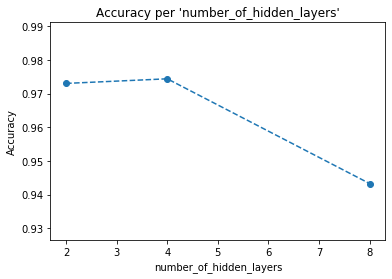




   number_of_hidden_layers  Accuracy
0                        2  0.973001
1                        4  0.974368
2                        8  0.943267


In [21]:
nnpt.plot_result()

In [22]:
nnpt.reset_config()

In [23]:
nnpt.set_number_of_units_per_hidden_layer([10, 20, 48])
nnpt.set_number_of_hidden_layers(2)

In [24]:
nnpt.parameter_config

{'number_of_hidden_layers': [2],
 'number_of_units_per_hidden_layer': [10, 20, 48],
 'epochs': [100],
 'batch_size': [64],
 'activation_function': ['relu'],
 'loss_function': ['categorical_crossentropy'],
 'optimizer': ['sgd']}

In [25]:
nnpt.run()

Epoch 1/100
26329/26329 [==============================] - 1s 49us/step - loss: 2.3052 - acc: 0.1401
Epoch 2/100
26329/26329 [==============================] - 1s 26us/step - loss: 2.0351 - acc: 0.2531
Epoch 3/100
26329/26329 [==============================] - 1s 26us/step - loss: 1.7813 - acc: 0.3597
Epoch 4/100
26329/26329 [==============================] - 1s 26us/step - loss: 1.5444 - acc: 0.4298
Epoch 5/100
26329/26329 [==============================] - 1s 26us/step - loss: 1.3443 - acc: 0.4740
Epoch 6/100
26329/26329 [==============================] - 1s 27us/step - loss: 1.1267 - acc: 0.5604
Epoch 7/100
26329/26329 [==============================] - 1s 26us/step - loss: 0.9087 - acc: 0.6526
Epoch 8/100
26329/26329 [==============================] - 1s 27us/step - loss: 0.7465 - acc: 0.7230
Epoch 9/100
26329/26329 [==============================] - 1s 27us/step - loss: 0.6211 - acc: 0.7703
Epoch 10/100
26329/26329 [==============================] - 1s 26us/step - loss: 0.5251 - a

26329/26329 [==============================] - 1s 42us/step - loss: 0.0682 - acc: 0.9793
Epoch 61/100
26329/26329 [==============================] - 1s 43us/step - loss: 0.0674 - acc: 0.9790
Epoch 62/100
26329/26329 [==============================] - 1s 44us/step - loss: 0.0672 - acc: 0.9793
Epoch 63/100
26329/26329 [==============================] - 1s 42us/step - loss: 0.0664 - acc: 0.9791
Epoch 64/100
26329/26329 [==============================] - 1s 43us/step - loss: 0.0652 - acc: 0.9798
Epoch 65/100
26329/26329 [==============================] - 1s 45us/step - loss: 0.0648 - acc: 0.9804
Epoch 66/100
26329/26329 [==============================] - 1s 47us/step - loss: 0.0645 - acc: 0.9795
Epoch 67/100
26329/26329 [==============================] - 1s 44us/step - loss: 0.0637 - acc: 0.9810
Epoch 68/100
26329/26329 [==============================] - 1s 46us/step - loss: 0.0633 - acc: 0.9807
Epoch 69/100
26329/26329 [==============================] - 1s 44us/step - loss: 0.0627 - acc: 

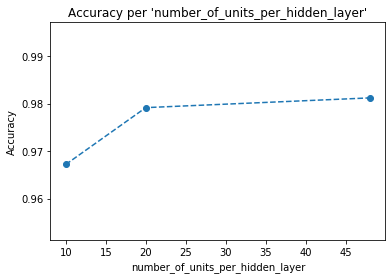




   number_of_units_per_hidden_layer  Accuracy
0                                10  0.967191
1                                20  0.979152
2                                48  0.981203


In [27]:
nnpt.plot_result()

In [28]:
nnpt.reset_config()
nnpt.set_number_of_hidden_layers(2)
nnpt.set_number_of_units_per_hidden_layer(48)
nnpt.set_epochs([50, 100, 200])

In [29]:
nnpt.run()

Epoch 1/50
26329/26329 [==============================] - 2s 82us/step - loss: 2.0193 - acc: 0.2657
Epoch 2/50
26329/26329 [==============================] - 1s 53us/step - loss: 1.3842 - acc: 0.5146
Epoch 3/50
26329/26329 [==============================] - 1s 53us/step - loss: 0.9481 - acc: 0.6574
Epoch 4/50
26329/26329 [==============================] - 1s 54us/step - loss: 0.6934 - acc: 0.7488
Epoch 5/50
26329/26329 [==============================] - 1s 52us/step - loss: 0.5308 - acc: 0.8066
Epoch 6/50
26329/26329 [==============================] - 1s 54us/step - loss: 0.4286 - acc: 0.8445
Epoch 7/50
26329/26329 [==============================] - 1s 53us/step - loss: 0.3619 - acc: 0.8703
Epoch 8/50
26329/26329 [==============================] - 1s 51us/step - loss: 0.3157 - acc: 0.8876
Epoch 9/50
26329/26329 [==============================] - 2s 61us/step - loss: 0.2809 - acc: 0.9006
Epoch 10/50
26329/26329 [==============================] - 1s 53us/step - loss: 0.2536 - acc: 0.9117

KeyboardInterrupt: 

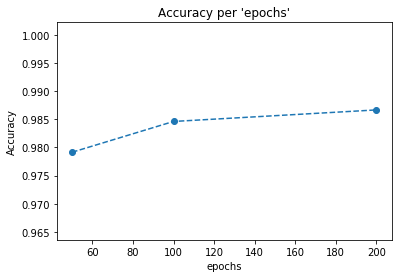




   epochs  Accuracy
0      50  0.979152
1     100  0.984621
2     200  0.986671


In [25]:
nnpt.plot_result()

In [27]:
nnpt.set_number_of_units_per_hidden_layer([48, 64, 128])
nnpt.set_epochs(200)
nnpt.run()

Epoch 1/200
26329/26329 [==============================] - 1s 53us/step - loss: 2.0882 - acc: 0.2783
Epoch 2/200
26329/26329 [==============================] - 1s 24us/step - loss: 1.4450 - acc: 0.5014
Epoch 3/200
26329/26329 [==============================] - 1s 23us/step - loss: 0.9539 - acc: 0.6813
Epoch 4/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.6482 - acc: 0.7872
Epoch 5/200
26329/26329 [==============================] - 1s 23us/step - loss: 0.4792 - acc: 0.8471
Epoch 6/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.3827 - acc: 0.8749
Epoch 7/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.3224 - acc: 0.8936
Epoch 8/200
26329/26329 [==============================] - 1s 23us/step - loss: 0.2801 - acc: 0.9093
Epoch 9/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.2490 - acc: 0.9197
Epoch 10/200
26329/26329 [==============================] - 1s 26us/step - loss: 0.2239 - a

26329/26329 [==============================] - 1s 23us/step - loss: 0.0173 - acc: 0.9966
Epoch 160/200
26329/26329 [==============================] - 1s 22us/step - loss: 0.0169 - acc: 0.9964
Epoch 161/200
26329/26329 [==============================] - 1s 22us/step - loss: 0.0171 - acc: 0.9962
Epoch 162/200
26329/26329 [==============================] - 1s 22us/step - loss: 0.0166 - acc: 0.9971
Epoch 163/200
26329/26329 [==============================] - 1s 23us/step - loss: 0.0171 - acc: 0.9966
Epoch 164/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0170 - acc: 0.9967
Epoch 165/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.0164 - acc: 0.9967
Epoch 166/200
26329/26329 [==============================] - 1s 27us/step - loss: 0.0166 - acc: 0.9967
Epoch 167/200
26329/26329 [==============================] - 1s 28us/step - loss: 0.0162 - acc: 0.9968
Epoch 168/200
26329/26329 [==============================] - 1s 26us/step - loss: 0.016

26329/26329 [==============================] - 1s 23us/step - loss: 0.0186 - acc: 0.9960
Epoch 119/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.0185 - acc: 0.9962
Epoch 120/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0182 - acc: 0.9961
Epoch 121/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.0184 - acc: 0.9960
Epoch 122/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0180 - acc: 0.9964
Epoch 123/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0177 - acc: 0.9961
Epoch 124/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0176 - acc: 0.9962
Epoch 125/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.0174 - acc: 0.9964
Epoch 126/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0172 - acc: 0.9964
Epoch 127/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.017

26329/26329 [==============================] - 1s 31us/step - loss: 0.0248 - acc: 0.9951
Epoch 78/200
26329/26329 [==============================] - 1s 29us/step - loss: 0.0243 - acc: 0.9949
Epoch 79/200
26329/26329 [==============================] - 1s 28us/step - loss: 0.0243 - acc: 0.9951
Epoch 80/200
26329/26329 [==============================] - 1s 27us/step - loss: 0.0236 - acc: 0.9954
Epoch 81/200
26329/26329 [==============================] - 1s 28us/step - loss: 0.0234 - acc: 0.9953
Epoch 82/200
26329/26329 [==============================] - 1s 28us/step - loss: 0.0230 - acc: 0.9953
Epoch 83/200
26329/26329 [==============================] - 1s 29us/step - loss: 0.0231 - acc: 0.9952
Epoch 84/200
26329/26329 [==============================] - 1s 28us/step - loss: 0.0224 - acc: 0.9959
Epoch 85/200
26329/26329 [==============================] - 1s 28us/step - loss: 0.0221 - acc: 0.9954
Epoch 86/200
26329/26329 [==============================] - 1s 29us/step - loss: 0.0220 - acc: 

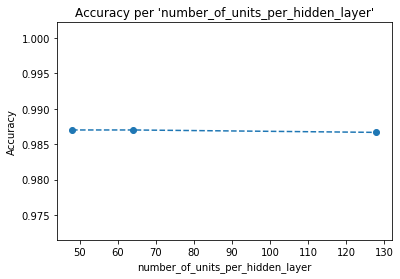




   number_of_units_per_hidden_layer  Accuracy
0                                48  0.987013
1                                64  0.987013
2                               128  0.986671


In [28]:
nnpt.plot_result()

In [34]:
nnpt.parameter_config

{'number_of_hidden_layers': [2],
 'number_of_units_per_hidden_layer': [48, 64, 128],
 'epochs': [200],
 'batch_size': [64],
 'activation_function': ['relu'],
 'loss_function': ['categorical_crossentropy'],
 'optimizer': ['sgd']}

In [35]:
nnpt.set_number_of_units_per_hidden_layer(48)
nnpt.set_loss_function(['mean_squared_error', 'categorical_crossentropy'])

In [36]:
nnpt.run()

Epoch 1/200
26329/26329 [==============================] - 1s 54us/step - loss: 0.0840 - acc: 0.1082
Epoch 2/200
26329/26329 [==============================] - 1s 23us/step - loss: 0.0834 - acc: 0.1215
Epoch 3/200
26329/26329 [==============================] - 1s 21us/step - loss: 0.0829 - acc: 0.1310
Epoch 4/200
26329/26329 [==============================] - 1s 21us/step - loss: 0.0824 - acc: 0.1412
Epoch 5/200
26329/26329 [==============================] - 1s 22us/step - loss: 0.0817 - acc: 0.1427
Epoch 6/200
26329/26329 [==============================] - 1s 21us/step - loss: 0.0810 - acc: 0.1400
Epoch 7/200
26329/26329 [==============================] - 1s 22us/step - loss: 0.0802 - acc: 0.1374
Epoch 8/200
26329/26329 [==============================] - 1s 21us/step - loss: 0.0795 - acc: 0.1351
Epoch 9/200
26329/26329 [==============================] - 1s 22us/step - loss: 0.0787 - acc: 0.1343
Epoch 10/200
26329/26329 [==============================] - 1s 21us/step - loss: 0.0781 - a

26329/26329 [==============================] - 1s 22us/step - loss: 0.0164 - acc: 0.8990
Epoch 161/200
26329/26329 [==============================] - 1s 21us/step - loss: 0.0162 - acc: 0.8998
Epoch 162/200
26329/26329 [==============================] - 1s 21us/step - loss: 0.0160 - acc: 0.9009
Epoch 163/200
26329/26329 [==============================] - 1s 22us/step - loss: 0.0159 - acc: 0.9020
Epoch 164/200
26329/26329 [==============================] - 1s 21us/step - loss: 0.0157 - acc: 0.9029
Epoch 165/200
26329/26329 [==============================] - 1s 20us/step - loss: 0.0156 - acc: 0.9035
Epoch 166/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0154 - acc: 0.9051
Epoch 167/200
26329/26329 [==============================] - 1s 21us/step - loss: 0.0153 - acc: 0.9060
Epoch 168/200
26329/26329 [==============================] - 1s 21us/step - loss: 0.0151 - acc: 0.9065
Epoch 169/200
26329/26329 [==============================] - 1s 21us/step - loss: 0.015

26329/26329 [==============================] - 1s 25us/step - loss: 0.0187 - acc: 0.9958
Epoch 121/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.0182 - acc: 0.9963
Epoch 122/200
26329/26329 [==============================] - 1s 23us/step - loss: 0.0182 - acc: 0.9962
Epoch 123/200
26329/26329 [==============================] - 1s 23us/step - loss: 0.0181 - acc: 0.9963
Epoch 124/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.0180 - acc: 0.9959
Epoch 125/200
26329/26329 [==============================] - 1s 26us/step - loss: 0.0177 - acc: 0.9962
Epoch 126/200
26329/26329 [==============================] - 1s 26us/step - loss: 0.0175 - acc: 0.9963
Epoch 127/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0173 - acc: 0.9963
Epoch 128/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.0174 - acc: 0.9964
Epoch 129/200
26329/26329 [==============================] - 1s 27us/step - loss: 0.017

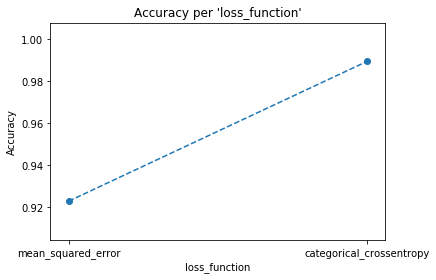




              loss_function  Accuracy
0        mean_squared_error  0.922761
1  categorical_crossentropy  0.989405


In [37]:
nnpt.plot_result()

In [41]:
nnpt.set_loss_function('categorical_crossentropy')
nnpt.set_optimizer(['sgd', 'adam'])
nnpt.parameter_config

{'number_of_hidden_layers': [2],
 'number_of_units_per_hidden_layer': [48],
 'epochs': [200],
 'batch_size': [64],
 'activation_function': ['relu'],
 'loss_function': ['categorical_crossentropy'],
 'optimizer': ['sgd', 'adam']}

In [42]:
nnpt.run()

Epoch 1/200
26329/26329 [==============================] - 2s 65us/step - loss: 2.0664 - acc: 0.2611
Epoch 2/200
26329/26329 [==============================] - 1s 25us/step - loss: 1.4981 - acc: 0.4716
Epoch 3/200
26329/26329 [==============================] - 1s 25us/step - loss: 1.0372 - acc: 0.6570
Epoch 4/200
26329/26329 [==============================] - 1s 26us/step - loss: 0.6847 - acc: 0.7777
Epoch 5/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.4820 - acc: 0.8403
Epoch 6/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.3705 - acc: 0.8767
Epoch 7/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.3039 - acc: 0.9009
Epoch 8/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.2600 - acc: 0.9145
Epoch 9/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.2290 - acc: 0.9254
Epoch 10/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.2056 - a

26329/26329 [==============================] - 1s 25us/step - loss: 0.0145 - acc: 0.9977
Epoch 161/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0145 - acc: 0.9976
Epoch 162/200
26329/26329 [==============================] - 1s 24us/step - loss: 0.0145 - acc: 0.9977
Epoch 163/200
26329/26329 [==============================] - 1s 26us/step - loss: 0.0142 - acc: 0.9979
Epoch 164/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.0142 - acc: 0.9977
Epoch 165/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.0140 - acc: 0.9977
Epoch 166/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.0139 - acc: 0.9980
Epoch 167/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.0137 - acc: 0.9979
Epoch 168/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.0136 - acc: 0.9980
Epoch 169/200
26329/26329 [==============================] - 1s 25us/step - loss: 0.013

26329/26329 [==============================] - 1s 27us/step - loss: 0.0133 - acc: 0.9974
Epoch 121/200
26329/26329 [==============================] - 1s 29us/step - loss: 0.0070 - acc: 0.9993
Epoch 122/200
26329/26329 [==============================] - 1s 27us/step - loss: 0.0074 - acc: 0.9992
Epoch 123/200
26329/26329 [==============================] - 1s 28us/step - loss: 0.0078 - acc: 0.9991
Epoch 124/200
26329/26329 [==============================] - 1s 28us/step - loss: 0.0188 - acc: 0.9967
Epoch 125/200
26329/26329 [==============================] - 1s 26us/step - loss: 0.0098 - acc: 0.9984
Epoch 126/200
26329/26329 [==============================] - 1s 28us/step - loss: 0.0105 - acc: 0.9982
Epoch 127/200
26329/26329 [==============================] - 1s 28us/step - loss: 0.0105 - acc: 0.9981 ETA: 0s - loss: 0.0157 
Epoch 128/200
26329/26329 [==============================] - 1s 28us/step - loss: 0.0142 - acc: 0.9973
Epoch 129/200
26329/26329 [==============================] - 1s

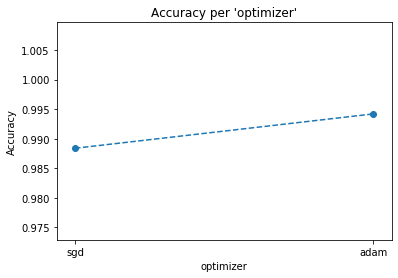




  optimizer  Accuracy
0       sgd   0.98838
1      adam   0.99419


In [43]:
nnpt.plot_result()

In [44]:
nnpt.result

[{'parameter_config': {'number_of_hidden_layers': 2,
   'number_of_units_per_hidden_layer': 48,
   'epochs': 200,
   'batch_size': 64,
   'activation_function': 'relu',
   'loss_function': 'categorical_crossentropy',
   'optimizer': 'sgd'},
  'result': {'model': <keras.engine.sequential.Sequential at 0x20eb5f37088>,
   'accuracy': 0.9883800410116199}},
 {'parameter_config': {'number_of_hidden_layers': 2,
   'number_of_units_per_hidden_layer': 48,
   'epochs': 200,
   'batch_size': 64,
   'activation_function': 'relu',
   'loss_function': 'categorical_crossentropy',
   'optimizer': 'adam'},
  'result': {'model': <keras.engine.sequential.Sequential at 0x20e87068fc8>,
   'accuracy': 0.99419002050581}}]